# Import necessary libraries


In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler


# Load the dataset


In [3]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')


# Display initial information


In [4]:
print(df.head())
print(df.info())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

# Phase 1: Problem Definition
# Objective: Predict churn using demographic, account, and service usage information.

# Phase 2: Data Ingestion and Preprocessing
# 1. Drop irrelevant columns

In [5]:
# Drop the 'customerID' column as it is not relevant for prediction
df.drop(columns=['customerID'], inplace=True)

# Convert 'TotalCharges' to numeric, coercing errors to handle non-numeric values
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Check for missing values in the dataset after conversion
missing_values = df.isnull().sum()

# Fill missing values in 'TotalCharges' with the median, as it represents a more robust central tendency
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

# Display the updated information and missing values count
df.info(), missing_values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


/var/folders/62/xfhps4hn7q5_kjt86g6h8f0r0000gp/T/ipykernel_37568/632459553.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


(None,
 gender               0
 SeniorCitizen        0
 Partner              0
 Dependents           0
 tenure               0
 PhoneService         0
 MultipleLines        0
 InternetService      0
 OnlineSecurity       0
 OnlineBackup         0
 DeviceProtection     0
 TechSupport          0
 StreamingTV          0
 StreamingMovies      0
 Contract             0
 PaperlessBilling     0
 PaymentMethod        0
 MonthlyCharges       0
 TotalCharges        11
 Churn                0
 dtype: int64)

# Phase 3: Exploratory Data Analysis (EDA)


/var/folders/62/xfhps4hn7q5_kjt86g6h8f0r0000gp/T/ipykernel_37568/1216890746.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette='pastel')


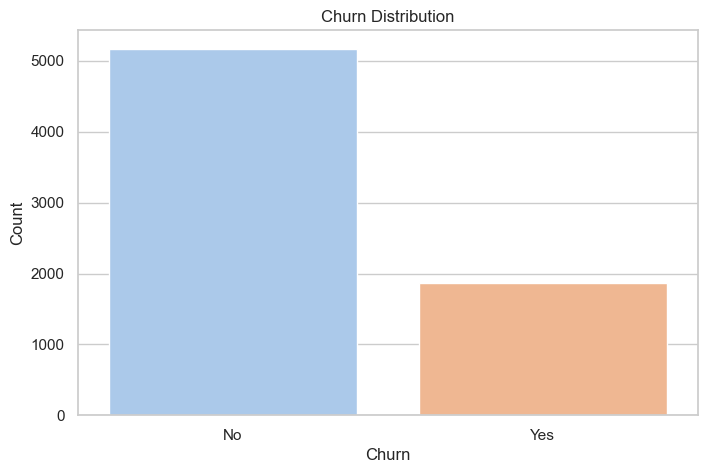

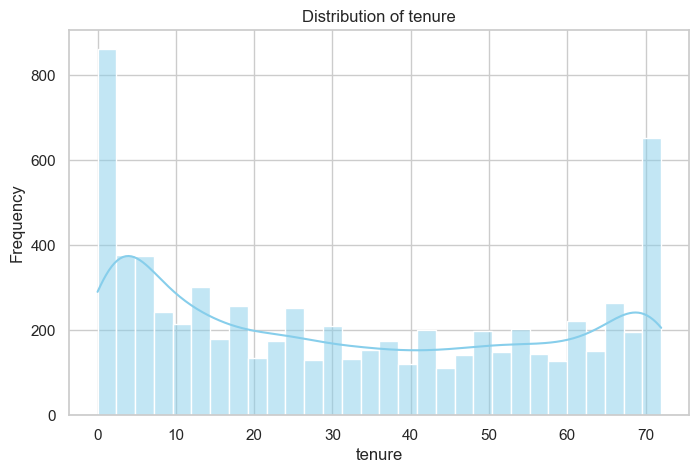

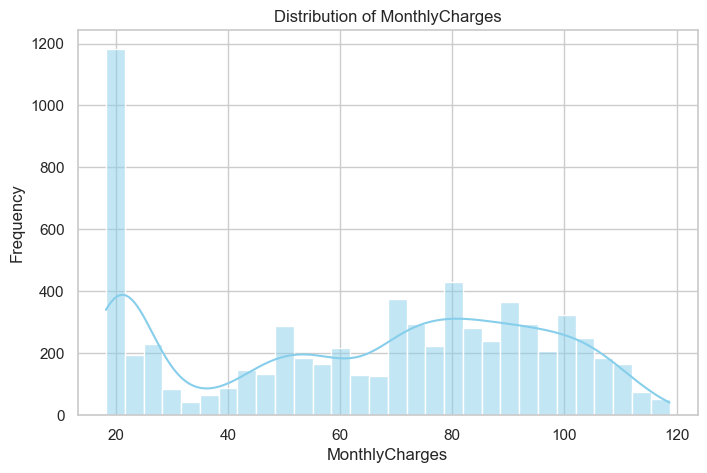

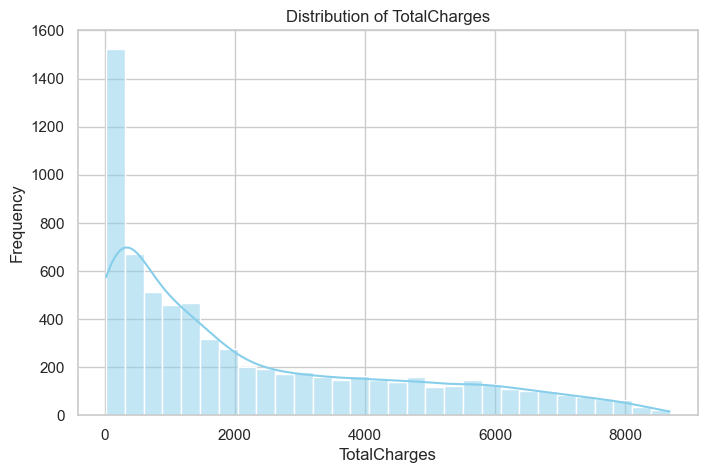

/var/folders/62/xfhps4hn7q5_kjt86g6h8f0r0000gp/T/ipykernel_37568/1216890746.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='tenure', data=df, palette='pastel')


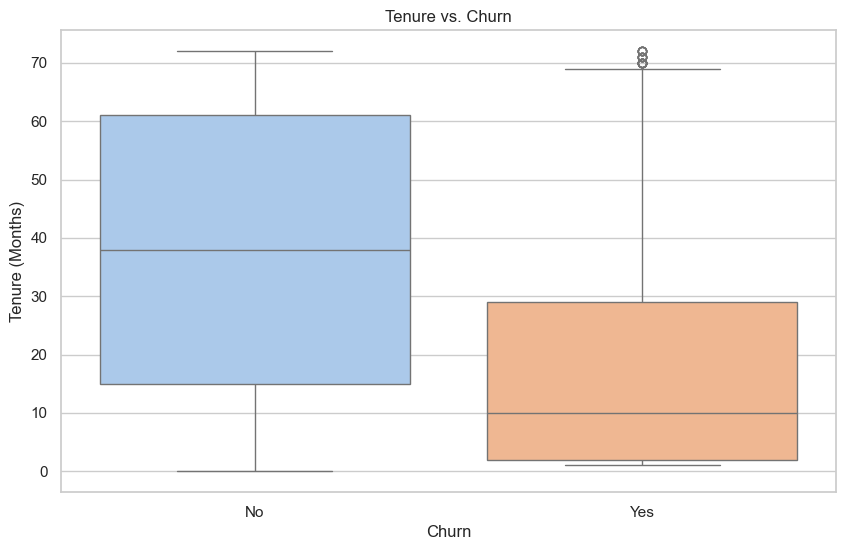

/var/folders/62/xfhps4hn7q5_kjt86g6h8f0r0000gp/T/ipykernel_37568/1216890746.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='MonthlyCharges', data=df, palette='pastel')


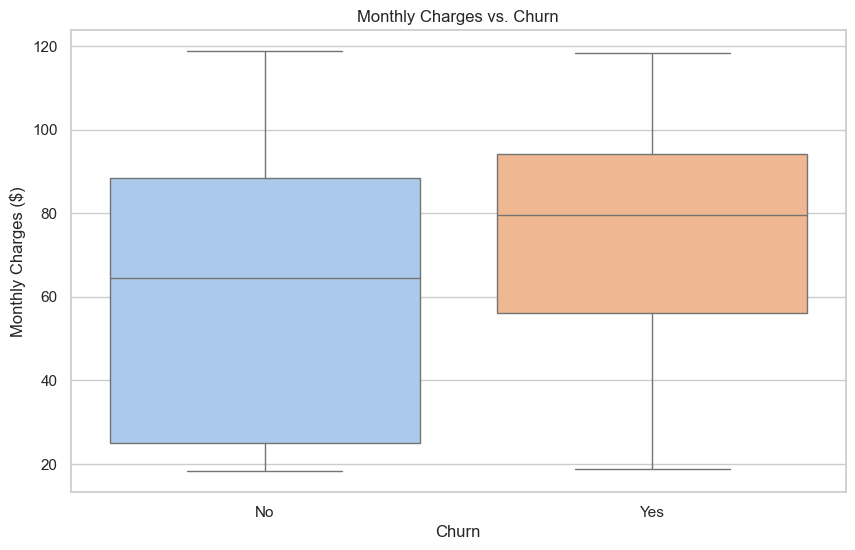

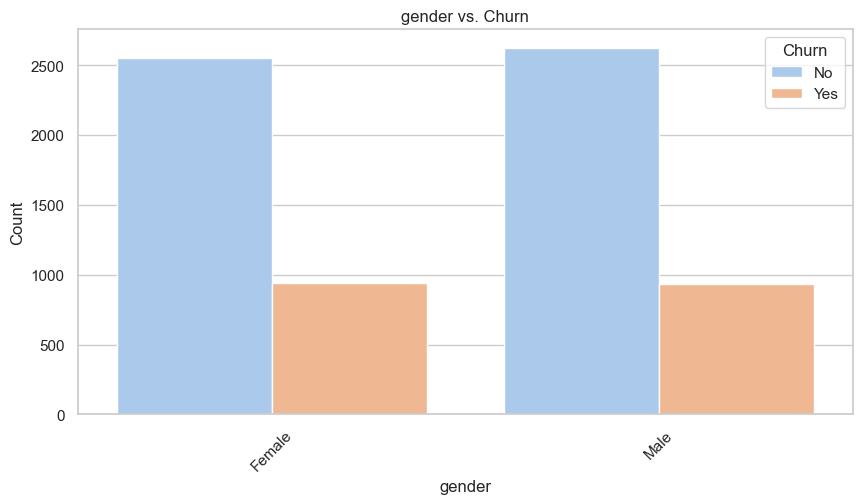

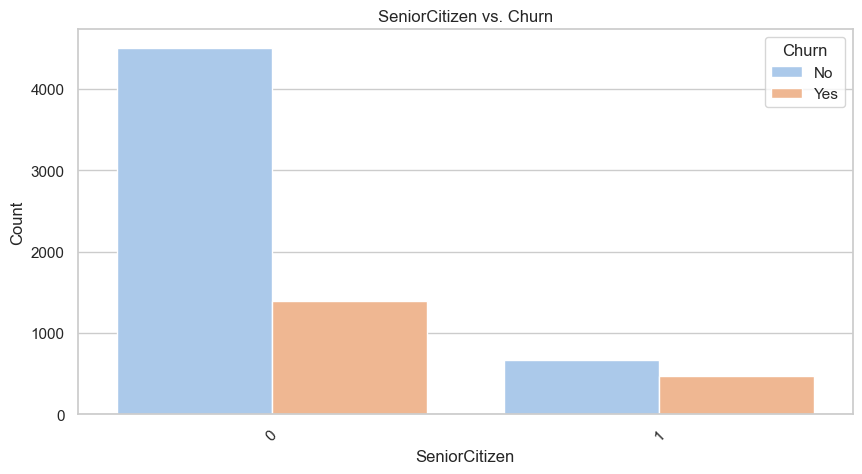

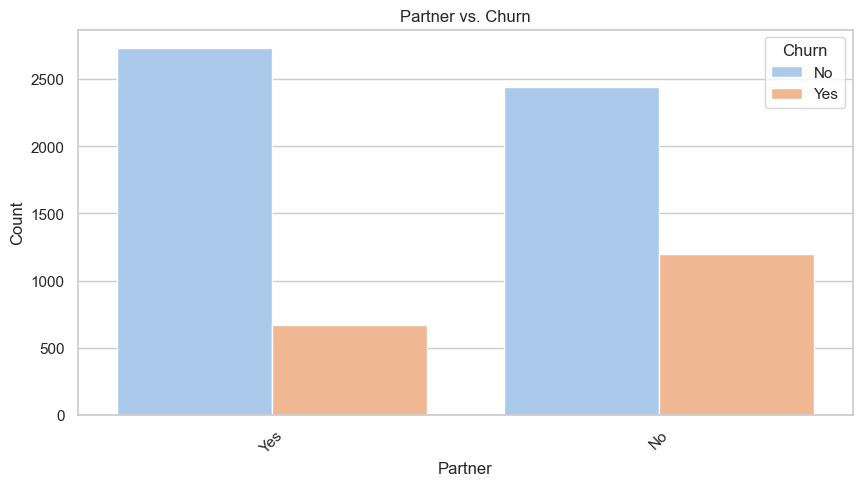

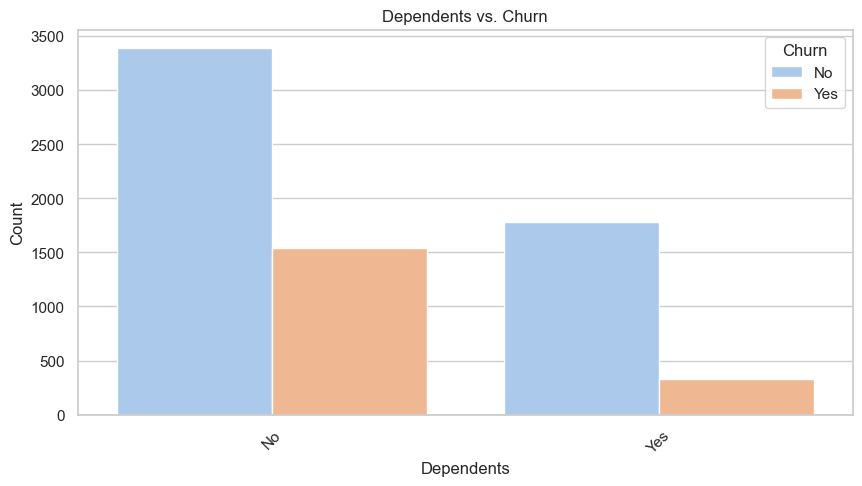

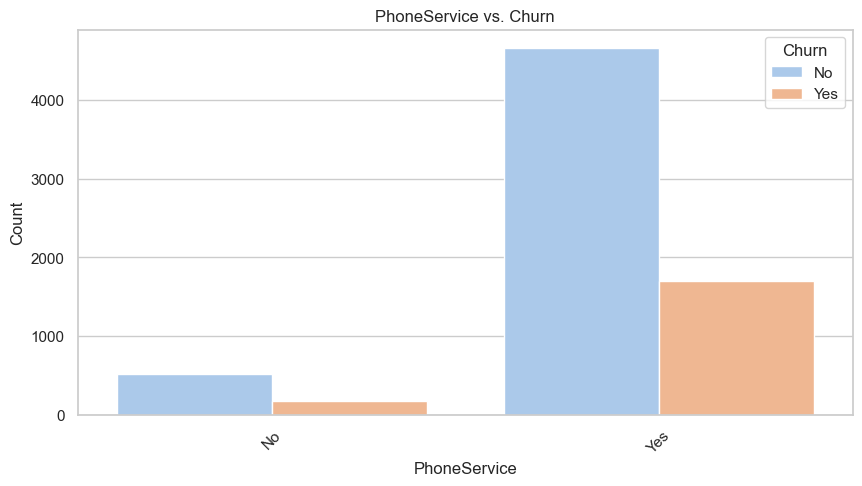

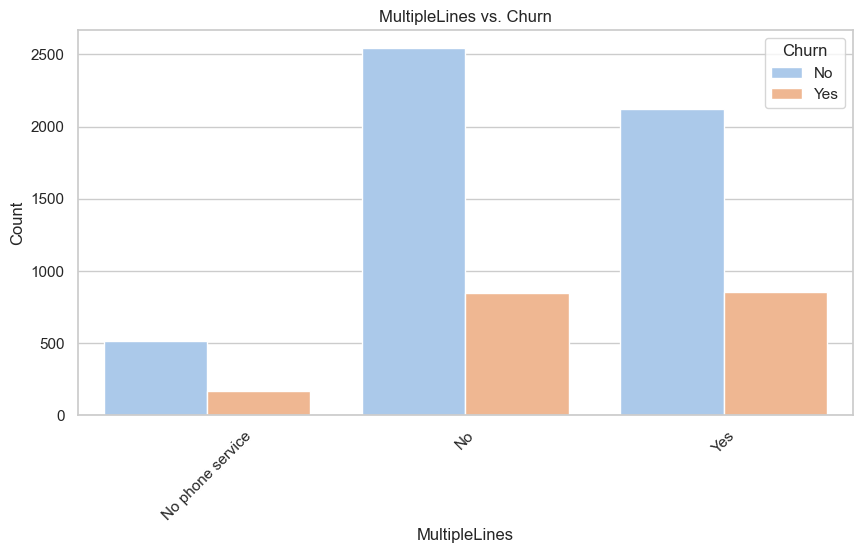

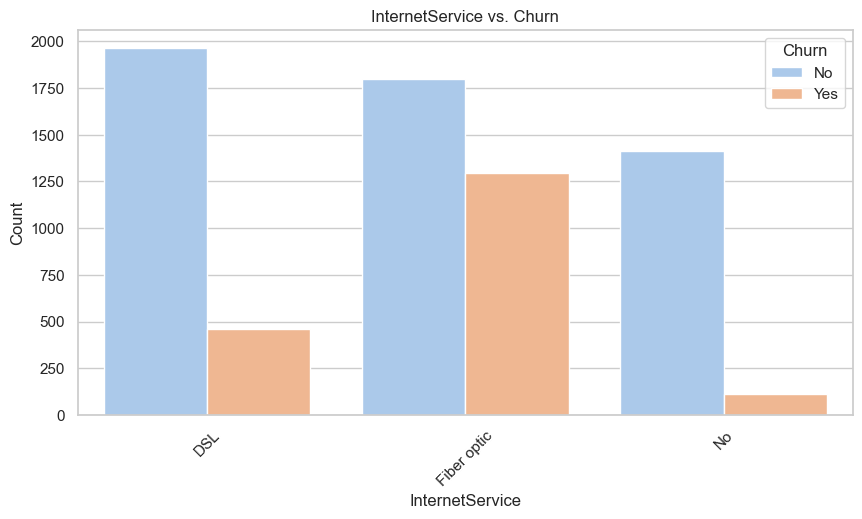

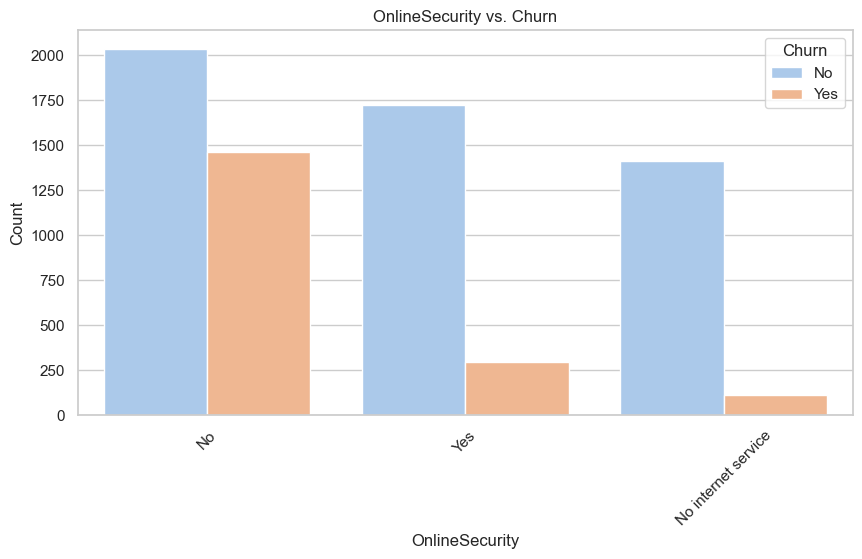

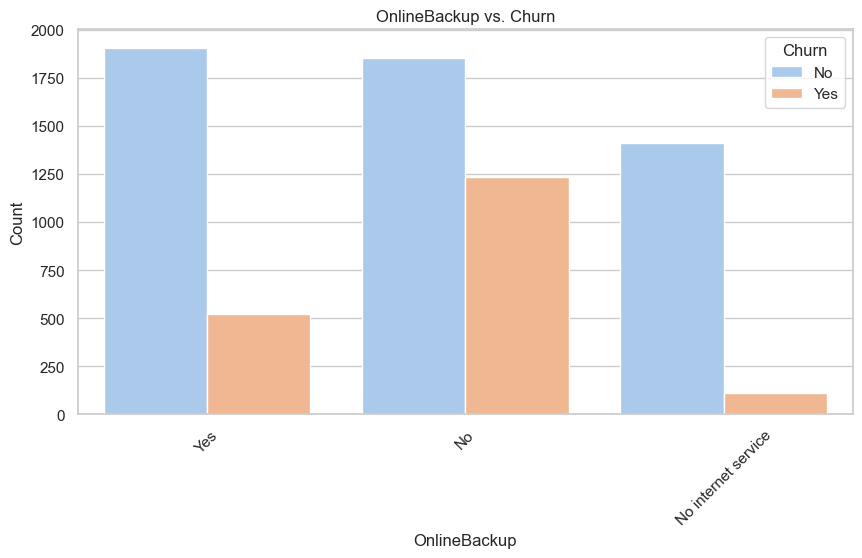

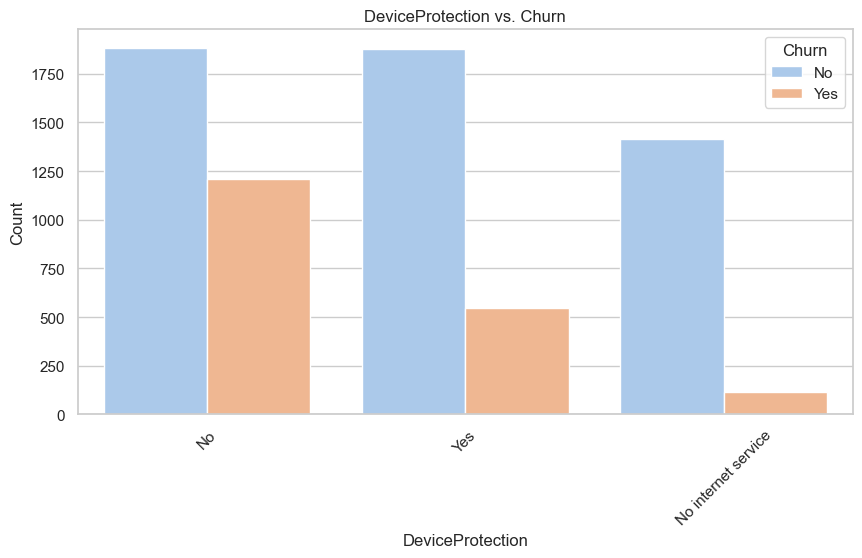

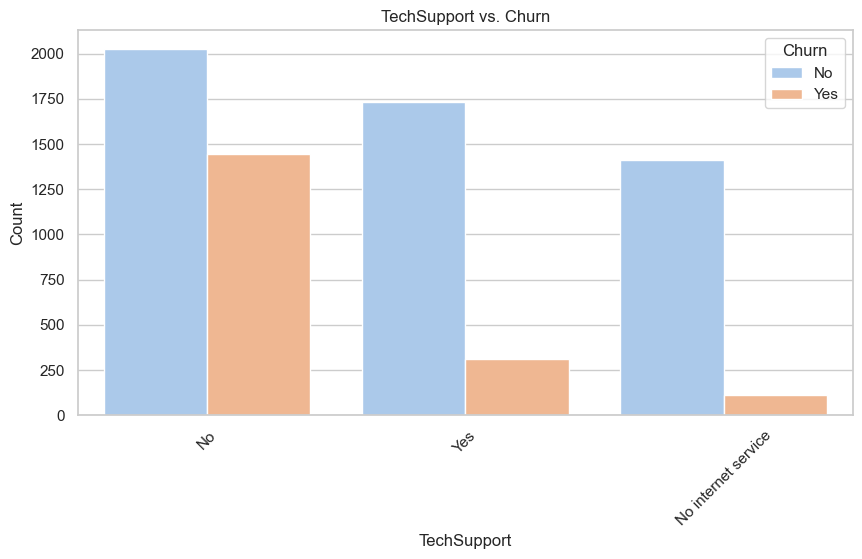

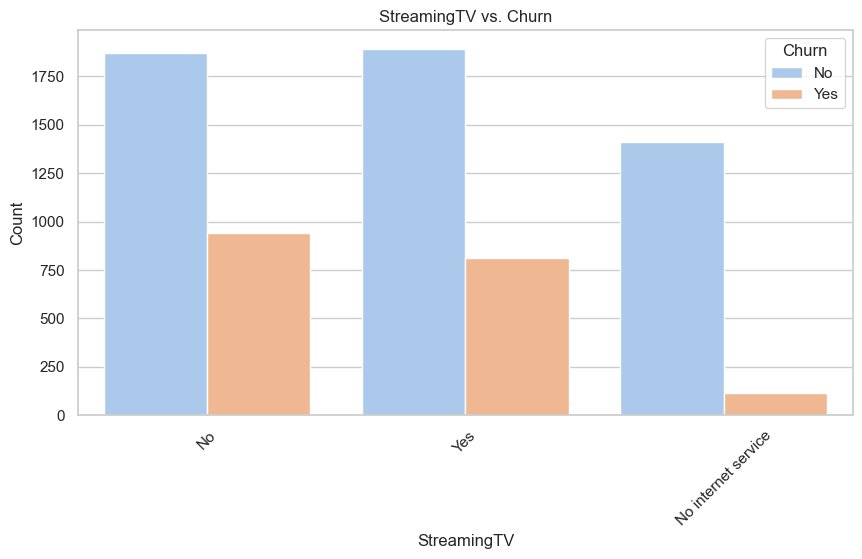

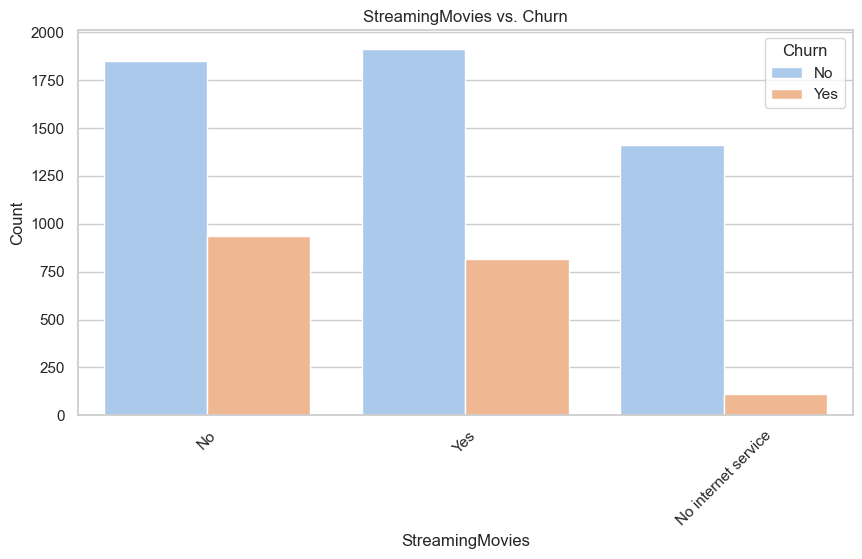

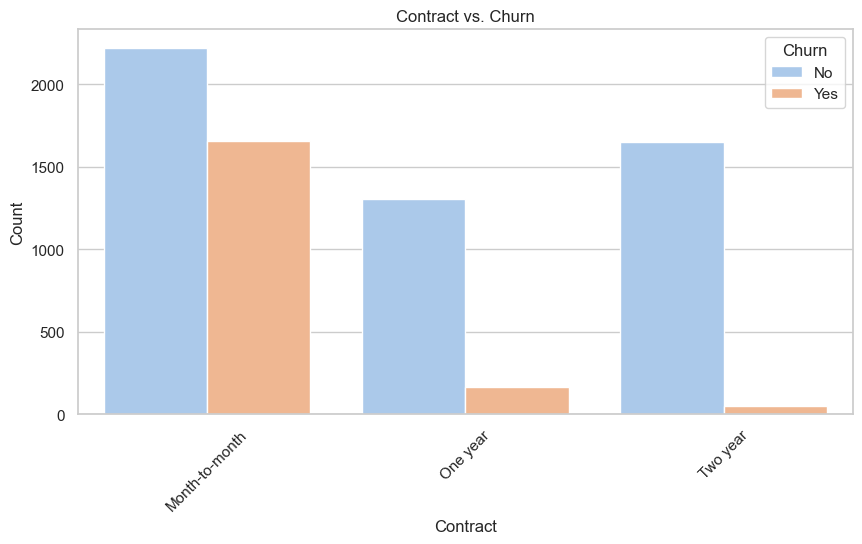

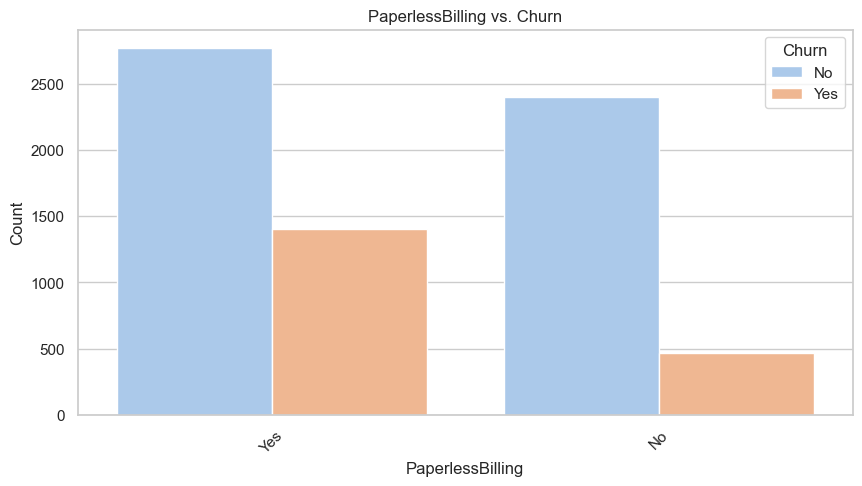

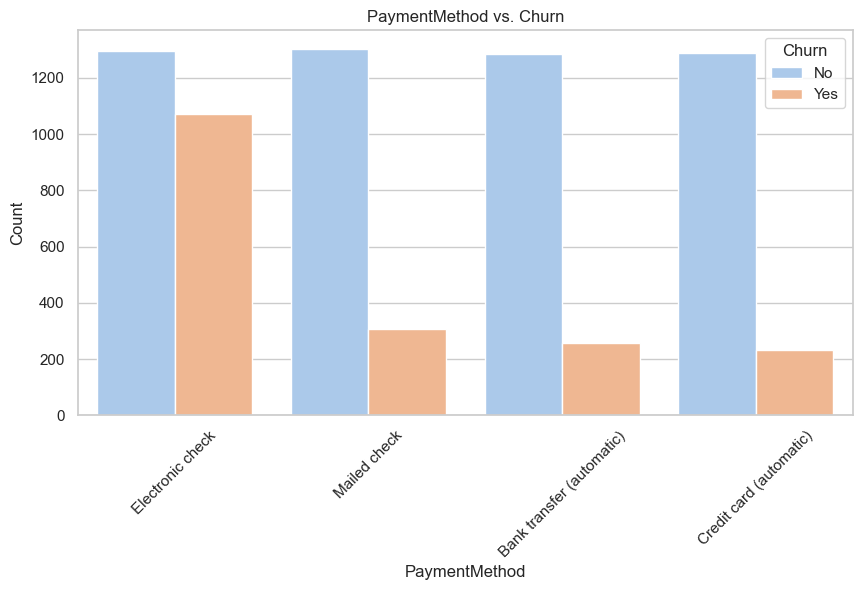

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Univariate analysis: Churn distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='Churn', data=df, palette='pastel')
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

# Distribution of numeric features
numeric_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
for feature in numeric_features:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[feature], bins=30, kde=True, color='skyblue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

# Bivariate analysis: Tenure vs. Churn
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='tenure', data=df, palette='pastel')
plt.title('Tenure vs. Churn')
plt.xlabel('Churn')
plt.ylabel('Tenure (Months)')
plt.show()

# Bivariate analysis: Monthly Charges vs. Churn
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df, palette='pastel')
plt.title('Monthly Charges vs. Churn')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges ($)')
plt.show()

# Analyzing the relationship between categorical features and 'Churn'
categorical_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 
                        'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
                        'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
                        'Contract', 'PaperlessBilling', 'PaymentMethod']

for feature in categorical_features:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=feature, hue='Churn', data=df, palette='pastel')
    plt.title(f'{feature} vs. Churn')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend(title='Churn', loc='upper right')
    plt.xticks(rotation=45)
    plt.show()

# Phase 4: Feature Engineering
# Convert binary categorical columns to 0/1


In [7]:
from sklearn.preprocessing import StandardScaler

binary_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
df[binary_columns] = df[binary_columns].apply(lambda x: x.map({'Yes': 1, 'No': 0, 'Male': 1, 'Female': 0}))

# One-hot encoding for other categorical columns with more than two categories
df = pd.get_dummies(df, columns=['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
                                 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
                                 'Contract', 'PaymentMethod'], drop_first=True)

# Scaling Numerical Features
scaler = StandardScaler()
df[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(df[['tenure', 'MonthlyCharges', 'TotalCharges']])

# Display the transformed dataset
print(df.head())

   gender  SeniorCitizen  Partner  Dependents    tenure  PhoneService  \
0       0              0        1           0 -1.277445             0   
1       1              0        0           0  0.066327             1   
2       1              0        0           0 -1.236724             1   
3       1              0        0           0  0.514251             0   
4       0              0        0           0 -1.236724             1   

   PaperlessBilling  MonthlyCharges  TotalCharges  Churn  ...  \
0                 1       -1.160323     -0.994242      0  ...   
1                 0       -0.259629     -0.173244      0  ...   
2                 1       -0.362660     -0.959674      1  ...   
3                 0       -0.746535     -0.194766      0  ...   
4                 1        0.197365     -0.940470      1  ...   

   TechSupport_Yes  StreamingTV_No internet service  StreamingTV_Yes  \
0            False                            False            False   
1            False        


# Phase 5: Model Development
In this phase, we'll:

Split the data into training and test sets.
Build baseline models.
Evaluate model performance using various metrics.
Let's start by preparing the data for modeling.

Step 1: Data Splitting
We will split the data into training and test sets, using 80% of the data for training and 20% for testing.

Step 2: Building Baseline Models
We'll start with a simple model, such as Logistic Regression, to establish a baseline performance. Then, we can explore more complex models like Random Forests or Gradient Boosting.

Step 3: Model Evaluation
We will evaluate models using metrics such as accuracy, precision, recall, F1-score, and ROC-AUC score.

Let's proceed with these steps.

In [8]:
# Import necessary libraries for model development
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

# Step 1: Data Splitting
# Define features (X) and target variable (y)
X = df.drop(columns=['Churn'])  # Features
y = df['Churn']                 # Target variable

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 2: Building a Baseline Model (Logistic Regression)
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train, y_train)

# Step 3: Model Evaluation
# Make predictions on the test set
y_pred = logistic_model.predict(X_test)
y_pred_proba = logistic_model.predict_proba(X_test)[:, 1]  # Probability estimates for ROC-AUC

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Display the evaluation metrics
evaluation_metrics = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
    'ROC-AUC Score': roc_auc
}

# Display the classification report and confusion matrix
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

evaluation_metrics, classification_rep, conf_matrix


({'Accuracy': 0.8048261178140526,
  'Precision': np.float64(0.6551724137931034),
  'Recall': np.float64(0.5588235294117647),
  'F1 Score': np.float64(0.6031746031746031),
  'ROC-AUC Score': np.float64(0.8419954015861943)},
 '              precision    recall  f1-score   support\n\n           0       0.85      0.89      0.87      1035\n           1       0.66      0.56      0.60       374\n\n    accuracy                           0.80      1409\n   macro avg       0.75      0.73      0.74      1409\nweighted avg       0.80      0.80      0.80      1409\n',
 array([[925, 110],
        [165, 209]]))

# Model 1: Logistic Regression

In [10]:
# Train the Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train, y_train)

# Predictions and evaluation for Logistic Regression
y_pred_logistic = logistic_model.predict(X_test)
y_pred_proba_logistic = logistic_model.predict_proba(X_test)[:, 1]

accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
precision_logistic = precision_score(y_test, y_pred_logistic)
recall_logistic = recall_score(y_test, y_pred_logistic)
f1_logistic = f1_score(y_test, y_pred_logistic)
roc_auc_logistic = roc_auc_score(y_test, y_pred_proba_logistic)


# Model 2: Random Forest

In [11]:
# Train a Random Forest Classifier
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)

# Predictions and evaluation for Random Forest
y_pred_rf = random_forest_model.predict(X_test)
y_pred_proba_rf = random_forest_model.predict_proba(X_test)[:, 1]

accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf)

#  Model 3: XGBoost

In [12]:
# Train a Gradient Boosting Model (XGBoost)
xgboost_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgboost_model.fit(X_train, y_train)

# Predictions and evaluation for XGBoost
y_pred_xgb = xgboost_model.predict(X_test)
y_pred_proba_xgb = xgboost_model.predict_proba(X_test)[:, 1]

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
roc_auc_xgb = roc_auc_score(y_test, y_pred_proba_xgb)


/Users/naman/Downloads/ End-to-End Machine Learning Pipeline/mlpipeline/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [02:40:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


# Model Comparison

In [13]:
# Compile results into a comparison table
model_comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'XGBoost'],
    'Accuracy': [accuracy_logistic, accuracy_rf, accuracy_xgb],
    'Precision': [precision_logistic, precision_rf, precision_xgb],
    'Recall': [recall_logistic, recall_rf, recall_xgb],
    'F1 Score': [f1_logistic, f1_rf, f1_xgb],
    'ROC-AUC': [roc_auc_logistic, roc_auc_rf, roc_auc_xgb]
})

# Display the comparison table
print("Model Comparison:")
print(model_comparison)

Model Comparison:
                 Model  Accuracy  Precision    Recall  F1 Score   ROC-AUC
0  Logistic Regression  0.804826   0.655172  0.558824  0.603175  0.841995
1        Random Forest  0.784244   0.618243  0.489305  0.546269  0.821321
2              XGBoost  0.782115   0.602446  0.526738  0.562054  0.816621


# Phase 6: Hyperparameter Tuning

In [14]:
from sklearn.model_selection import GridSearchCV

# --------------------- Hyperparameter Tuning for Random Forest ---------------------
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf_grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                              param_grid=rf_param_grid,
                              scoring='f1',
                              cv=3,
                              n_jobs=-1,
                              verbose=2)

rf_grid_search.fit(X_train, y_train)

print(f"Best parameters for Random Forest: {rf_grid_search.best_params_}")
best_rf_model = rf_grid_search.best_estimator_

# Evaluate the tuned Random Forest model
y_pred_best_rf = best_rf_model.predict(X_test)
accuracy_best_rf = accuracy_score(y_test, y_pred_best_rf)
precision_best_rf = precision_score(y_test, y_pred_best_rf)
recall_best_rf = recall_score(y_test, y_pred_best_rf)
f1_best_rf = f1_score(y_test, y_pred_best_rf)
roc_auc_best_rf = roc_auc_score(y_test, best_rf_model.predict_proba(X_test)[:, 1])

# --------------------- Hyperparameter Tuning for XGBoost ---------------------
xgb_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

xgb_grid_search = GridSearchCV(estimator=xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
                               param_grid=xgb_param_grid,
                               scoring='f1',
                               cv=3,
                               n_jobs=-1,
                               verbose=2)

xgb_grid_search.fit(X_train, y_train)

print(f"Best parameters for XGBoost: {xgb_grid_search.best_params_}")
best_xgb_model = xgb_grid_search.best_estimator_

# Evaluate the tuned XGBoost model
y_pred_best_xgb = best_xgb_model.predict(X_test)
accuracy_best_xgb = accuracy_score(y_test, y_pred_best_xgb)
precision_best_xgb = precision_score(y_test, y_pred_best_xgb)
recall_best_xgb = recall_score(y_test, y_pred_best_xgb)
f1_best_xgb = f1_score(y_test, y_pred_best_xgb)
roc_auc_best_xgb = roc_auc_score(y_test, best_xgb_model.predict_proba(X_test)[:, 1])

# Compile results into a comparison table for the tuned models
model_comparison_tuned = pd.DataFrame({
    'Model': ['Tuned Random Forest', 'Tuned XGBoost'],
    'Accuracy': [accuracy_best_rf, accuracy_best_xgb],
    'Precision': [precision_best_rf, precision_best_xgb],
    'Recall': [recall_best_rf, recall_best_xgb],
    'F1 Score': [f1_best_rf, f1_best_xgb],
    'ROC-AUC': [roc_auc_best_rf, roc_auc_best_xgb]
})

print("\nModel Comparison After Hyperparameter Tuning:")
print(model_comparison_tuned)


Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.8s
[CV] END max

/Users/naman/Downloads/ End-to-End Machine Learning Pipeline/mlpipeline/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [02:44:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/naman/Downloads/ End-to-End Machine Learning Pipeline/mlpipeline/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [02:44:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/naman/Downloads/ End-to-End Machine Learning Pipeline/mlpipeline/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [02:44:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/naman/Downloads/ End-to-End Machine Learning Pipeline/mlpipeline/lib/python3.12/site-packages/xgboost/

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estima

/Users/naman/Downloads/ End-to-End Machine Learning Pipeline/mlpipeline/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [02:44:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/naman/Downloads/ End-to-End Machine Learning Pipeline/mlpipeline/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [02:44:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/naman/Downloads/ End-to-End Machine Learning Pipeline/mlpipeline/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [02:44:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/naman/Downloads/ End-to-End Machine Learning Pipeline/mlpipeline/lib/python3.12/site-packages/xgboost/

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=200, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=10, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=10, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=10, n_estimators=100, subsample=1.0; total time=   0.3s


/Users/naman/Downloads/ End-to-End Machine Learning Pipeline/mlpipeline/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [02:44:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/naman/Downloads/ End-to-End Machine Learning Pipeline/mlpipeline/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [02:44:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/naman/Downloads/ End-to-End Machine Learning Pipeline/mlpipeline/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [02:44:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/naman/Downloads/ End-to-End Machine Learning Pipeline/mlpipeline/lib/python3.12/site-packages/xgboost/

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=200, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=6, n_estimators=200, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=10, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=10, n_estimators=200, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=10, n_estima

/Users/naman/Downloads/ End-to-End Machine Learning Pipeline/mlpipeline/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [02:44:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/naman/Downloads/ End-to-End Machine Learning Pipeline/mlpipeline/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [02:44:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/naman/Downloads/ End-to-End Machine Learning Pipeline/mlpipeline/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [02:44:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/naman/Downloads/ End-to-End Machine Learning Pipeline/mlpipeline/lib/python3.12/site-packages/xgboost/

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=10, n_estimators=100, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=20

/Users/naman/Downloads/ End-to-End Machine Learning Pipeline/mlpipeline/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [02:44:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/naman/Downloads/ End-to-End Machine Learning Pipeline/mlpipeline/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [02:44:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/naman/Downloads/ End-to-End Machine Learning Pipeline/mlpipeline/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [02:44:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/naman/Downloads/ End-to-End Machine Learning Pipeline/mlpipeline/lib/python3.12/site-packages/xgboost/

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=10, n_estimators=200, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=10, n_estimators=200, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=200, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=10, n_estimators

/Users/naman/Downloads/ End-to-End Machine Learning Pipeline/mlpipeline/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [02:44:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/naman/Downloads/ End-to-End Machine Learning Pipeline/mlpipeline/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [02:44:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/naman/Downloads/ End-to-End Machine Learning Pipeline/mlpipeline/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [02:44:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/naman/Downloads/ End-to-End Machine Learning Pipeline/mlpipeline/lib/python3.12/site-packages/xgboost/

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=200, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=200, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=6, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=10, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=10, n_estimators=100, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=10, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=10, n_estimators=200, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimato

/Users/naman/Downloads/ End-to-End Machine Learning Pipeline/mlpipeline/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [02:44:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/naman/Downloads/ End-to-End Machine Learning Pipeline/mlpipeline/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [02:44:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/naman/Downloads/ End-to-End Machine Learning Pipeline/mlpipeline/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [02:44:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/naman/Downloads/ End-to-End Machine Learning Pipeline/mlpipeline/lib/python3.12/site-packages/xgboost/

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=10, n_estimators=200, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=10, n_estimators=200, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=10, n_estimators=100, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=10, n_estima

/Users/naman/Downloads/ End-to-End Machine Learning Pipeline/mlpipeline/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [02:44:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/naman/Downloads/ End-to-End Machine Learning Pipeline/mlpipeline/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [02:44:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/naman/Downloads/ End-to-End Machine Learning Pipeline/mlpipeline/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [02:44:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/naman/Downloads/ End-to-End Machine Learning Pipeline/mlpipeline/lib/python3.12/site-packages/xgboost/

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, n_estimators=100, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=10, n_estimators=200, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=10, n_estimators=200, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, n_estima

/Users/naman/Downloads/ End-to-End Machine Learning Pipeline/mlpipeline/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [02:44:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/naman/Downloads/ End-to-End Machine Learning Pipeline/mlpipeline/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [02:44:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/naman/Downloads/ End-to-End Machine Learning Pipeline/mlpipeline/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [02:44:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/naman/Downloads/ End-to-End Machine Learning Pipeline/mlpipeline/lib/python3.12/site-packages/xgboost/

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=10, n_estimators=200, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, n_estimators=100, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, n_estimators=200, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, n_estimators=200, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=10, n_estimators=100, subsample=0.8; total time=   0.3s


/Users/naman/Downloads/ End-to-End Machine Learning Pipeline/mlpipeline/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [02:44:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/naman/Downloads/ End-to-End Machine Learning Pipeline/mlpipeline/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [02:44:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/naman/Downloads/ End-to-End Machine Learning Pipeline/mlpipeline/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [02:44:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/naman/Downloads/ End-to-End Machine Learning Pipeline/mlpipeline/lib/python3.12/site-packages/xgboost/

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=10, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=10, n_estimators=100, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, n_estimators=200, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, n_estimators=200, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=6, n_estimators=200, subsample=1.0; total time=   0.3s


/Users/naman/Downloads/ End-to-End Machine Learning Pipeline/mlpipeline/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [02:44:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/naman/Downloads/ End-to-End Machine Learning Pipeline/mlpipeline/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [02:44:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/naman/Downloads/ End-to-End Machine Learning Pipeline/mlpipeline/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [02:44:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/naman/Downloads/ End-to-End Machine Learning Pipeline/mlpipeline/lib/python3.12/site-packages/xgboost/

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=10, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=10, n_estimators=200, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=10, n_estimators=100, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=10, n_estimators=100, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=10, n_estimators=200, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estim

/Users/naman/Downloads/ End-to-End Machine Learning Pipeline/mlpipeline/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [02:44:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/naman/Downloads/ End-to-End Machine Learning Pipeline/mlpipeline/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [02:44:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/naman/Downloads/ End-to-End Machine Learning Pipeline/mlpipeline/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [02:44:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/naman/Downloads/ End-to-End Machine Learning Pipeline/mlpipeline/lib/python3.12/site-packages/xgboost/

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=10, n_estimators=200, subsample=1.0; total time=   0.6s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, n_estimators=10

/Users/naman/Downloads/ End-to-End Machine Learning Pipeline/mlpipeline/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [02:44:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/naman/Downloads/ End-to-End Machine Learning Pipeline/mlpipeline/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [02:44:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/naman/Downloads/ End-to-End Machine Learning Pipeline/mlpipeline/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [02:44:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/naman/Downloads/ End-to-End Machine Learning Pipeline/mlpipeline/lib/python3.12/site-packages/xgboost/

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=10, n_estimators=200, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, n_estimators=200, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=10, n_estimators=200, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=10, n_estimators=100, subsample=0.8; total time=   0.3s


/Users/naman/Downloads/ End-to-End Machine Learning Pipeline/mlpipeline/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [02:44:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/naman/Downloads/ End-to-End Machine Learning Pipeline/mlpipeline/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [02:44:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/naman/Downloads/ End-to-End Machine Learning Pipeline/mlpipeline/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [02:44:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/naman/Downloads/ End-to-End Machine Learning Pipeline/mlpipeline/lib/python3.12/site-packages/xgboost/

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, n_estimators=200, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=10, n_estimators=100, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=6, n_estimators=200, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=10, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=10, n_estimators=200, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=10, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=10, n_estimators=100, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=10, n_estimato

/Users/naman/Downloads/ End-to-End Machine Learning Pipeline/mlpipeline/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [02:44:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/naman/Downloads/ End-to-End Machine Learning Pipeline/mlpipeline/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [02:44:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/naman/Downloads/ End-to-End Machine Learning Pipeline/mlpipeline/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [02:44:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=10, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=10, n_estimators=200, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=10, n_estimators=200, subsample=1.0; total time=   0.2s
Best parameters for XGBoost: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}

Model Comparison After Hyperparameter Tuning:
                 Model  Accuracy  Precision    Recall  F1 Score   ROC-AUC
0  Tuned Random Forest  0.802697   0.664384  0.518717  0.582583  0.842157
1        Tuned XGBoost  0.804826   0.664452  0.534759  0.592593  0.844234


/Users/naman/Downloads/ End-to-End Machine Learning Pipeline/mlpipeline/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [02:44:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


# Feature Importance Analysis

In [15]:
# Feature Importance for the tuned Random Forest model
importances_rf = best_rf_model.feature_importances_
feature_importance_rf = pd.DataFrame({'Feature': X.columns, 'Importance': importances_rf})
feature_importance_rf.sort_values(by='Importance', ascending=False, inplace=True)

# Feature Importance for the tuned XGBoost model
importances_xgb = best_xgb_model.feature_importances_
feature_importance_xgb = pd.DataFrame({'Feature': X.columns, 'Importance': importances_xgb})
feature_importance_xgb.sort_values(by='Importance', ascending=False, inplace=True)

# Display the top 10 important features for both models
print("\nTop 10 Important Features for Random Forest:")
print(feature_importance_rf.head(10))

print("\nTop 10 Important Features for XGBoost:")
print(feature_importance_xgb.head(10))



Top 10 Important Features for Random Forest:
                           Feature  Importance
8                     TotalCharges    0.177746
4                           tenure    0.176618
7                   MonthlyCharges    0.126919
11     InternetService_Fiber optic    0.070460
28  PaymentMethod_Electronic check    0.067192
26               Contract_Two year    0.049143
14              OnlineSecurity_Yes    0.032823
25               Contract_One year    0.030112
20                 TechSupport_Yes    0.027306
6                 PaperlessBilling    0.023947

Top 10 Important Features for XGBoost:
                             Feature  Importance
26                 Contract_Two year    0.211754
11       InternetService_Fiber optic    0.174294
25                 Contract_One year    0.107159
28    PaymentMethod_Electronic check    0.074490
12                InternetService_No    0.072769
15  OnlineBackup_No internet service    0.048801
4                             tenure    0.045280
24   

# Model Deployment

In [16]:
import joblib

# Save the best-performing model (e.g., tuned Random Forest)
joblib.dump(best_rf_model, 'best_rf_model.pkl')

# Save the best-performing XGBoost model if needed
joblib.dump(best_xgb_model, 'best_xgb_model.pkl')


['best_xgb_model.pkl']

# Step 4: Evaluate Model Performance and Interpret Results

Step 4.1: Evaluating the Model Improvements

In [17]:
# Display the comparison of the original vs. tuned models
original_model_comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest (Original)', 'XGBoost (Original)'],
    'Accuracy': [0.804826, 0.784244, 0.782115],
    'Precision': [0.655172, 0.618243, 0.602446],
    'Recall': [0.558824, 0.489305, 0.526738],
    'F1 Score': [0.603175, 0.546269, 0.562054],
    'ROC-AUC': [0.841995, 0.821321, 0.816621]
})

# Combine with the tuned results
model_comparison_all = pd.concat([original_model_comparison, model_comparison_tuned], ignore_index=True)

print("\nComparison Between Original and Tuned Models:")
print(model_comparison_all)



Comparison Between Original and Tuned Models:
                      Model  Accuracy  Precision    Recall  F1 Score   ROC-AUC
0       Logistic Regression  0.804826   0.655172  0.558824  0.603175  0.841995
1  Random Forest (Original)  0.784244   0.618243  0.489305  0.546269  0.821321
2        XGBoost (Original)  0.782115   0.602446  0.526738  0.562054  0.816621
3       Tuned Random Forest  0.802697   0.664384  0.518717  0.582583  0.842157
4             Tuned XGBoost  0.804826   0.664452  0.534759  0.592593  0.844234
